# Imports

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn import decomposition

from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from collections import Counter

import operator
from sklearn.model_selection import GridSearchCV

# Step 1: Prepare Project

Load libraries Load dataset


In [3]:
#use sklearn library
air_data = pd.read_excel('AirQualityUCI.xlsx')
#https://archive.ics.uci.edu/ml/datasets/Air+Quality


# Step 2: Define Problem
What is your task? What are your goals? What do you want to achieve?



# Step 3: Exploratory Analysis
Understand your data: Take a “peek” of your data, answer basic questions about the dataset. Summarise your data. Explore descriptive statistics and visualisations.



# Take a “peek” of your data


In [4]:
print "\nHead of the dataset:\n", air_data.head()
print "------------------------------------------------------------------------------------------------"
print "\nTail of the dataset:\n", air_data.tail()




Head of the dataset:
        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487 

# Is there null instances?

In [16]:

null_data = air_data[air_data.isnull().any(axis=1)]
print null_data

Empty DataFrame
Columns: [Date, Time, CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]
Index: []


In [15]:
#air_data.dropna(axis=0, how='all')


# Dimensions of the data Answer basic questions about the dataset:

#  What is the shape of your data -  "curse of dimensionality"?  


In [33]:

features = air_data
#is the target feature
features = features.drop('C6H6(GT)', axis=1)
features = features.drop('Date', axis=1)
features = features.drop('Time', axis=1)
labels = air_data['C6H6(GT)'].values
features = features.values


print "\nShape of air_data:", features.shape



Shape of air_data: (9357, 12)


# Data Type of Each Attribute :What are the data types? Numeric? Categorical? 

In [19]:
print "\nType of the columns:\n",air_data.dtypes


Type of the columns:
Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object


# Summarise your data


# Explore descriptive statistics

In [20]:
#Descriptive Statistics
print (air_data.describe())


            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.869652  -159.090093     1.865576     894.475963   
std      77.657170   329.817015   139.789093    41.380154     342.315902   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.004958     711.000000   
50%       1.500000  1052.500000  -200.000000     7.886653     894.500000   
75%       2.600000  1221.250000  -200.000000    13.636091    1104.750000   
max      11.900000  2039.750000  1189.000000    63.741476    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.604200    794.872333    58.135898   1391.363266   974.951534   
std     257.424561    321.977031   126.931428    467.192382   456.922728   
min    -200

# Summarise distribution 

Summarise distribution of instances across classes, you need to know how balanced the class values are.
Highly imbalanced problems (a lot more observations for one class than another) are common 
and may need special handling in the data preparation stage of the project.


We will groupby air data with the target value in order to check that the instances are normally distributted at the target values. As we can see from the plot houses values are not normally distributed, most of the cases have target value 50  (16 cases) whereas other house values have sugnificant smaller target. 

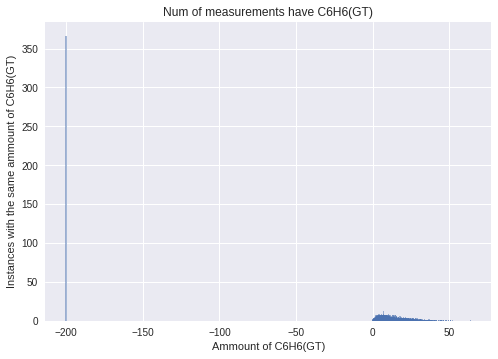

In [23]:

counters= Counter(labels)

lists = sorted(counters.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x,y, align='center', alpha=0.5)
plt.xlabel('Ammount of C6H6(GT)')
plt.ylabel('Instances with the same ammount of C6H6(GT)')
plt.title("Num of measurements have C6H6(GT)")
plt.show()
#print(boston_pd.groupby('target').size())

# Correlation between attributes


Correlation refers to the relationship between two variables and how they may or
may not change together. The most common method for calculating correlation is Pearson’s Correlation Coefficient, 
that assumes a normal distribution of the attributes involved. A correlation of -1 or 1 shows a full negative or positive 
correlation respectively. Whereas a value of 0 shows no correlation at all. Positive correlation means that if one variable increases the other also increases and when one variable decreases the other also decreases. Negative correlation means if one variable increases the other decreases and vice versa and zero correlation imenas is there is no relationship between the two variables such that the value of one variable changes and the other variable remains constant.
It is useful to know if variables are highly correlated, because some machine learning algorithms like linear and 
logistic regression can have poor performance if there are highly correlated input variables in their data.
As such, it is good to review all of the pair-wise correlations of the attributes in the dataset. 
For that scope I used the corr() function from the Pandas DataFrame to calculate the correlation matrix.


In [25]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = air_data.corr(method='pearson')


print(correlations)

corr_matrix = air_data.corr().abs()
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


#print boston_pd

               CO(GT)  PT08.S1(CO)   NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
CO(GT)          1.000        0.041  1.284e-01    -0.031          0.030    0.526        -0.090   
PT08.S1(CO)     0.041        1.000  1.700e-01     0.853          0.933    0.278         0.087   
NMHC(GT)        0.128        0.170  1.000e+00     0.037          0.110   -0.004         0.049   
C6H6(GT)       -0.031        0.853  3.733e-02     1.000          0.767   -0.001         0.512   
PT08.S2(NMHC)   0.030        0.933  1.101e-01     0.767          1.000    0.331        -0.074   
NOx(GT)         0.526        0.278 -4.413e-03    -0.001          0.331    1.000        -0.436   
PT08.S3(NOx)   -0.090        0.087  4.883e-02     0.512         -0.074   -0.436         1.000   
NO2(GT)         0.671        0.154  1.033e-01    -0.011          0.177    0.817        -0.256   
PT08.S4(NO2)   -0.074        0.845  1.627e-01     0.775          0.875    0.036         0.123   
PT08.S5(O3)     0.080        0

# Correlation Matrix
We can visualize these results about the correlation between variables.

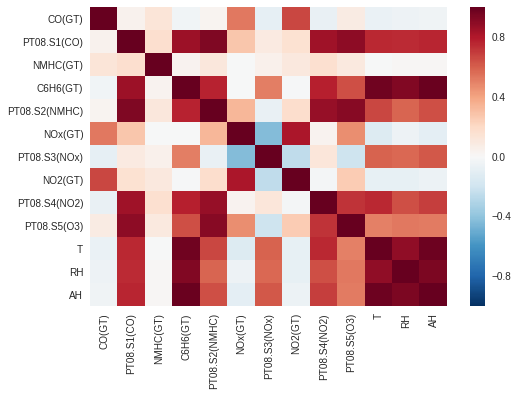

In [29]:

# In seaborn we can use a heatmap:
sns.heatmap(correlations)
plt.show()

# Visualisations
Two types of plots:

Univariate plots to better understand each attribute.
Multivariate plots to better understand the relationships between attributes (scatter matrix at the step bellow with
the correlation values).




# Univariate plots

# Histogram

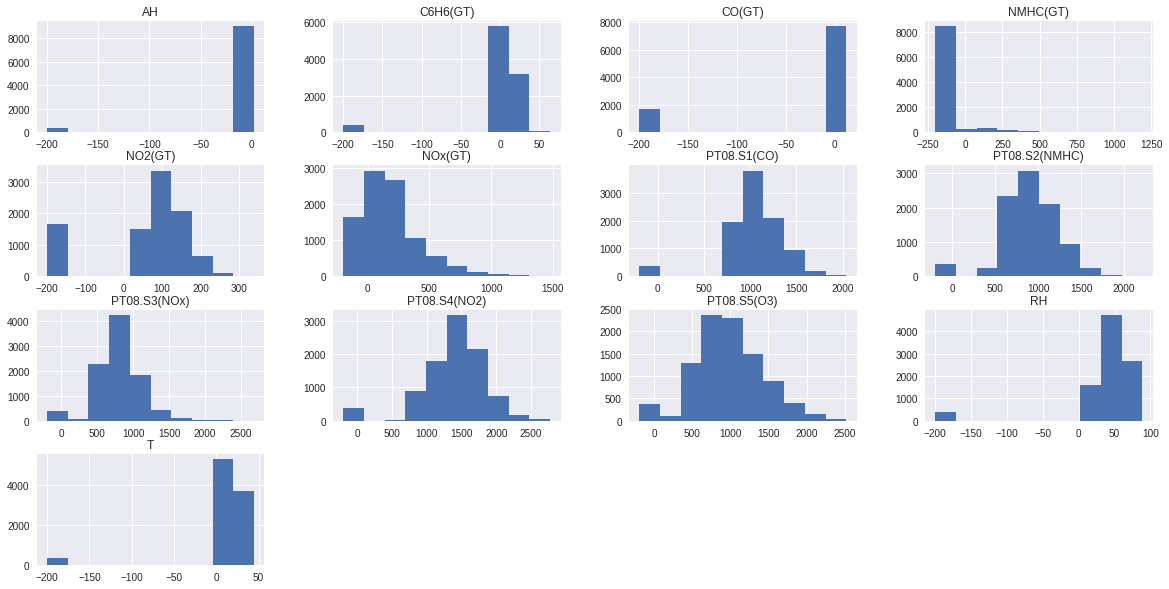

In [30]:
#Analysis through Visualisation

h = features.hist(figsize=(20,10))
plt.show()


# Density Plots

In [34]:


features.plot(kind='density', subplots=True, layout=(6,5), sharex=False, figsize=(50,50))
plt.show()

KeyboardInterrupt: 

# Box plots

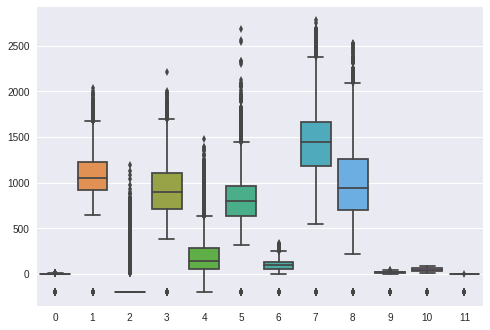

In [37]:
# Using seaborn

sns.boxplot(data=features)
plt.show()


# Step 4: Prepare Data
Data Cleaning/Data Wrangling/Collect more data (if necessary).
Data rescaling in order to make attributes use the same scale (range of values)
Algorithms will be benefit from that, eg: linear regression, K-means etc



# Rescale
 

In [38]:

# Rescale data (between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(features)

scaler2=MinMaxScaler()
rescaledY=scaler2.fit_transform(labels.reshape(-1, 1))
# summarise transformed data



# Standardise
Standardize features by removing the mean and scaling to unit variance

In [39]:
#Standardise Data

scaler = StandardScaler().fit(rescaledX)
standardX = scaler.transform(rescaledX)

scaler2=StandardScaler().fit(rescaledY)
standardY=scaler2.transform(rescaledY)
print "Mean after scalling is:", standardX.mean()
print "Variance after scalling is:", standardX.var()



Mean after scalling is: -6.581208766970398e-17
Variance after scalling is: 1.0


# Normalise

In [40]:

# Normalise data (length of 1)
scaler = Normalizer().fit(standardX)
normalizedX = scaler.transform(standardX)


scaler2 = Normalizer().fit(standardY)
normalizedY = scaler.transform(standardY)

X=normalizedX
Y=normalizedY

# Step 5: Feature Engineering
Feature selection/feture engineering (as in new features)/data transformations.



# Step 6: Algorithm Selection
Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.



# Cross validation

In [41]:

#set  num of kfolds
seed=7
kfold = KFold(n_splits=10, random_state=seed)

# Algorithms

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)


In [43]:


models = []
models.append(('LR',      LinearRegression()))
models.append(('RIDGE',   Ridge()))
models.append(('LASSO',   Lasso()))


# The scoring function to use
scoring = ['neg_mean_squared_error','neg_mean_absolute_error','r2']

# We are going to evaluate all classifiers, and store results in two lists:
results_mse={}
results_mae={}
results_r2={}
results = {}
names   = []
for score in scoring:
    results={}
    names   = []
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
        cv_results=(cv_results)
        results[name]=cv_results.mean()
        names.append(name)
        msg = "%s: %f (%f)--%s" % (name, cv_results.mean(), cv_results.std(),score)
        print(msg)
    if score=='neg_mean_squared_error':
        results_mse=results
    elif score=='neg_mean_absolute_error':
        results_mae=results
    else:
        results_r2=results
        
        
        
results_r2_sorted=  sorted(results_r2.items(), key=operator.itemgetter(1))
results_mse_sorted=  sorted(results_mse.items(), key=operator.itemgetter(1))
results_mae_sorted=  sorted(results_mae.items(), key=operator.itemgetter(1))
print "R^2:\n", results_r2_sorted
print "MSE:\n", results_mse_sorted
print "MAE:\n", results_mae_sorted

print "1st choice on training:",(results_mae_sorted[2])
print "2nd choice on training:",(results_mae_sorted[1])

LR: -0.154468 (0.012818)--neg_mean_squared_error
RIDGE: -0.154926 (0.012805)--neg_mean_squared_error
LASSO: -0.333071 (0.029202)--neg_mean_squared_error
LR: -0.222955 (0.008283)--neg_mean_absolute_error
RIDGE: -0.223666 (0.008294)--neg_mean_absolute_error
LASSO: -0.333034 (0.012978)--neg_mean_absolute_error
LR: 0.533888 (0.037481)--r2
RIDGE: 0.532471 (0.037916)--r2
LASSO: -0.001286 (0.001974)--r2
R^2:
[('LASSO', -0.001286148317802649), ('RIDGE', 0.5324710775047905), ('LR', 0.5338880980965296)]
MSE:
[('LASSO', -0.3330710630558255), ('RIDGE', -0.15492599680967045), ('LR', -0.1544675380753059)]
MAE:
[('LASSO', -0.33303402271994226), ('RIDGE', -0.22366577605823093), ('LR', -0.22295484018010647)]
('LR', -0.22295484018010647)


The Ridge algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on the test set. We will split the data set at test and train set.



# Step 7: Tunning hyperparameters,train the model, running test dataset



In [44]:

regressors=['LR', 'RIDGE','LASSO']

#With Hyper Parameters Tuning
for i in regressors:
    if i=="LR":
        model_LR=  LinearRegression()
        params_LR = {
            'fit_intercept':[True,False],
            'normalize':[True,False],
            'copy_X':[True, False] }
    elif i=="RIDGE":
        model_Ridge=Ridge()
        params_Ridge ={'solver' : ['svd','lsqr' ,'auto','cholesky'],
                 'alpha':[0.001,0.01,0.1,0.2],
                 'fit_intercept':[True, False],
                 'normalize':[True,False],
                 'tol':[0.001, 0.002, 0.01,0.1]}
    else: 
        model_Lasso=Lasso()
        params_Lasso = { 'alpha':[0.001,0.01,0.1,0.2],
                    'fit_intercept':[True, False],
                   'normalize':[True,False],
                  'max_iter':[1000,2000,500],
                    'tol':[0.001, 0.002, 0.01,0.1],
                 'selection':['cyclic','random']}





# Linear Regressor

In [45]:

model_LR_win = GridSearchCV(model_LR, param_grid=params_LR, n_jobs=-1)
#Learning
model_LR_win.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model_LR_win.best_params_)
#Prediction
prediction=model_LR_win.predict(X_test)

score='neg_mean_absolute_error'

neg_mean_absolute_error = cross_val_score(model_LR, X_train, Y_train, cv=kfold, scoring='neg_mean_absolute_error')
neg_mean_absolute_error=neg_mean_absolute_error.mean()
print "neg_mean_absolute_error after setting hyperparameters is:",(neg_mean_absolute_error)

('Best Hyper Parameters:', {'copy_X': True, 'normalize': True, 'fit_intercept': True})
neg_mean_absolute_error after setting hyperparameters is: -0.22295484018010647


# Lasso Regressor

In [46]:

model_Lasso_win = GridSearchCV(model_Lasso, param_grid=params_Lasso, n_jobs=-1)
#Learning
model_Lasso_win.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model_Lasso_win.best_params_)
#Prediction
prediction=model_Lasso_win.predict(X_test)
score='neg_mean_absolute_error'
neg_mean_absolute_error = cross_val_score(model_Lasso, X_train, Y_train, cv=kfold, scoring='neg_mean_absolute_error')
neg_mean_absolute_error=neg_mean_absolute_error.mean()
print "neg_mean_absolute_error after setting hyperparameters is:",(neg_mean_absolute_error)

('Best Hyper Parameters:', {'normalize': False, 'selection': 'cyclic', 'fit_intercept': True, 'max_iter': 1000, 'tol': 0.001, 'alpha': 0.001})
neg_mean_absolute_error after setting hyperparameters is: -0.33303402271994226


# Ridge Regressor

In [47]:

model_Ridge_win = GridSearchCV(model_Ridge, param_grid=params_Ridge, n_jobs=-1)
#Learning
model_Ridge_win.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model_Lasso_win.best_params_)
#Prediction
prediction=model_Ridge_win.predict(X_test)
#importing the metrics module
score='neg_mean_absolute_error'
#evaluation(Accuracy)
neg_mean_absolute_error = cross_val_score(model_Ridge, X_train, Y_train, cv=kfold, scoring='neg_mean_absolute_error')
neg_mean_absolute_error=neg_mean_absolute_error.mean()
print "neg_mean_absolute_error after setting hyperparameters is:",(neg_mean_absolute_error)

('Best Hyper Parameters:', {'normalize': False, 'selection': 'cyclic', 'fit_intercept': True, 'max_iter': 1000, 'tol': 0.001, 'alpha': 0.001})
neg_mean_absolute_error after setting hyperparameters is: -0.22366577605823093


# Step 8: Run testing dataset

# Liner Regressor

In [48]:

model_LR_win.fit(X_test,Y_test)
predictions_LR=model_LR_win.predict(X_test)
neg_mean_absolute_error_LR = cross_val_score(model_LR_win, X_test, Y_test, cv=kfold, scoring='neg_mean_absolute_error')
neg_mean_absolute_error_LR=neg_mean_absolute_error_LR.mean()
print "The model is :", model_LR_win
print "neg_mean_absolute_error for test dataset after setting  hyperparameters is:",(neg_mean_absolute_error_LR)


The model is : GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'normalize': [True, False], 'copy_X': [True, False], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
neg_mean_absolute_error for test dataset after setting  hyperparameters is: -0.253718537044171


# Lasso Regressor

In [49]:

model_Lasso_win.fit(X_test,Y_test)
predictions_Lasso=model_Lasso_win.predict(X_test)
neg_mean_absolute_error_Lasso = cross_val_score(model_Lasso_win, X_test, Y_test, cv=kfold, scoring='neg_mean_absolute_error')
neg_mean_absolute_error_Lasso=neg_mean_absolute_error_Lasso.mean()
print "The  model is :", model_Lasso_win
print "neg_mean_absolute_error for test dataset after setting  hyperparameters is:",(neg_mean_absolute_error_Lasso)

The  model is : GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'normalize': [True, False], 'selection': ['cyclic', 'random'], 'fit_intercept': [True, False], 'max_iter': [1000, 2000, 500], 'tol': [0.001, 0.002, 0.01, 0.1], 'alpha': [0.001, 0.01, 0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
neg_mean_absolute_error for test dataset after setting  hyperparameters is: -0.2501487531480461


# Ridge Regressor

In [75]:
model_Ridge_win.fit(X_test,Y_test)
predictions_Ridge=model_Ridge_win.predict(X_test)
neg_mean_absolute_error_Ridge = cross_val_score(model_Ridge_win, X_test, Y_test, cv=kfold, scoring='neg_mean_absolute_error')
neg_mean_absolute_error_Ridge=neg_mean_absolute_error_Ridge.mean()
print "The  model is :", model_Ridge_win
print "neg_mean_absolute_error for test dataset after setting  hyperparameters is:",(neg_mean_absolute_error_Ridge)

The  model is : GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'normalize': [True, False], 'alpha': [0.001, 0.01, 0.1, 0.2], 'fit_intercept': [True, False], 'tol': [0.001, 0.002, 0.01, 0.1], 'solver': ['svd', 'lsqr', 'auto', 'cholesky']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
neg_mean_absolute_error for test dataset after setting  hyperparameters is: -0.6261476751427445
